#Exercises XP, W8 DAY2

Exercise 1 : Understanding Data Visualization


* Explain why data visualization is important in data analysis.

Data visualization allows us to quickly interpret patterns, trends, and relationships—something that descriptive statistics alone don’t always reveal.

For example, in Anscombe’s Quartet, four datasets have identical statistics, but when plotted we see critical differences:

*  One is a normal linear relationship.
* Another is curved (non-linear).
* Another has an outlier that affects the slope.
* Another has an extreme point that dominates the correlation.


---

* Describe the purpose of a line graph in data visualization.

Purpose: Show TRENDS over time.

Use when: Data changes over a sequence (time, order).

Example: Temperature over a week, stock prices over a year.   


In [2]:
# ===  Import Libraries ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests, zipfile, io

In [ ]:
#  === Set style   ===
plt.style.use('ggplot')
sns.set_palette("cool")  # Cool color palette

#Exercise 2 – Line Plot: Temperature Variation

 * Create a simple line plot using Matplotlib that represents the temperature variations over a week.

* Use a list of temperature values for each day of the week and label the x-axis as “Day” and the y-axis as “Temperature (°F).

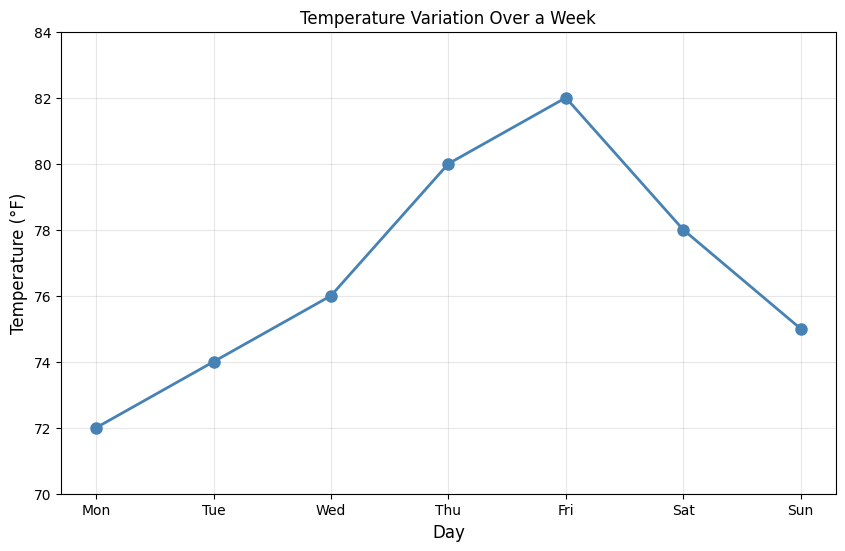

In [8]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
temperatures = [72, 74, 76, 80, 82, 78, 75]

plt.figure(figsize=(8,5))

plt.plot(days, temperatures,
           marker='o',           # Add points at each value
           linewidth=2,          # Thicker line
           markersize=8,         # Bigger points
           color='steelblue')    # Professional color

plt.title('Temperature Variation Over a Week')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Temperature (°F)', fontsize=12)
plt.grid(alpha=0.3)  # Subtle gridlines
plt.ylim(70, 84)  # Set Y-axis range to emphasize variation
plt.show()


#Exercise 3 : Monthly Sales with a Bar Chart

* Generate a bar chart using Matplotlib to visualize the monthly sales data for a retail store.
* Create a list of sales values for each month and label the x-axis as “Month” and the y-axis as “Sales Amount ($).

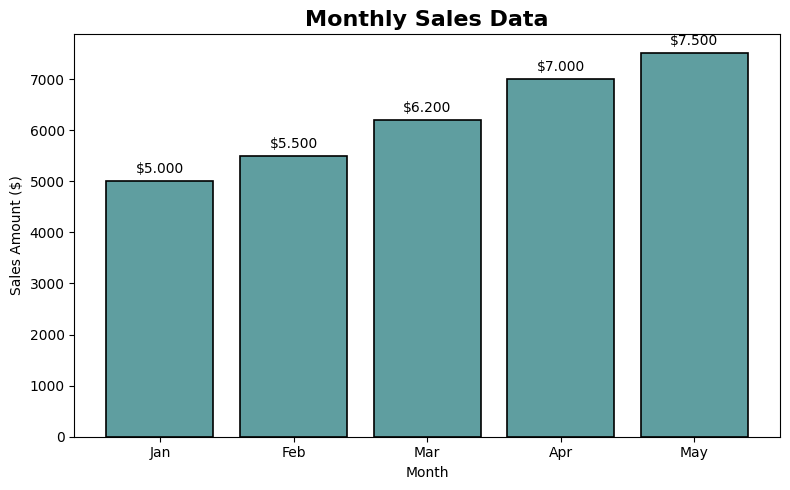

In [9]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
sales = [5000, 5500, 6200, 7000, 7500]

plt.figure(figsize=(8,5))
bars = plt.bar(months, sales, color='#5F9EA0', edgecolor='black',  linewidth=1.2)
plt.title('Monthly Sales Data', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales Amount ($)')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 100,
             f'${height:,.0f}'.replace(",", "."),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Prevent labels from being cut off
plt.show()



#Exercise 4 : Data Visualisation - Quarterly Revenue

Using the dataset: sales_data.csv

* Calculate the total quantity of products sold by the company.

* Identify the category that had the highest revenue and calculate how much revenue it generated.

* Determine the average revenue per sale in the dataset.

* Create a bar chart to visualize the total revenue generated in each quarter of the year (Q1, Q2, Q3, Q4).

In [10]:
## === Download and import the sales_data dataset.===

# Download and read the CSV from the ZIP file.

# URL of the ZIP (raw)
url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%205%20-%20Data%20Processing/W5D1%20-%20Data%20Visualization,%20Matplot/sales_data.zip"

# Download the ZIP file
r = requests.get(url)
r.raise_for_status()

# Open ZIP from memory
zip_file = zipfile.ZipFile(io.BytesIO(r.content))

# List files within the ZIP
print("Files in zip:", zip_file.namelist())

# Read the CSV file inside the ZIP
csv_file_name = zip_file.namelist()[0]  # 1° file
df = pd.read_csv(zip_file.open(csv_file_name))


df.head()



Files in zip: ['sales_data.csv']


,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.00,10.00,6000.00
1,2022-01-01,Laptop,Electronics,1200.00,5.00,6000.00
2,2022-01-02,T-Shirt,Clothing,20.00,50.00,1000.00
3,2022-01-03,Headphones,Electronics,100.00,20.00,2000.00
4,2022-01-04,T-Shirt,Clothing,20.00,25.00,500.00


Total quantity sold: $5.360
Category with highest revenue: Electronics. Revenue: $516.080
Average revenue per sale: $2.061


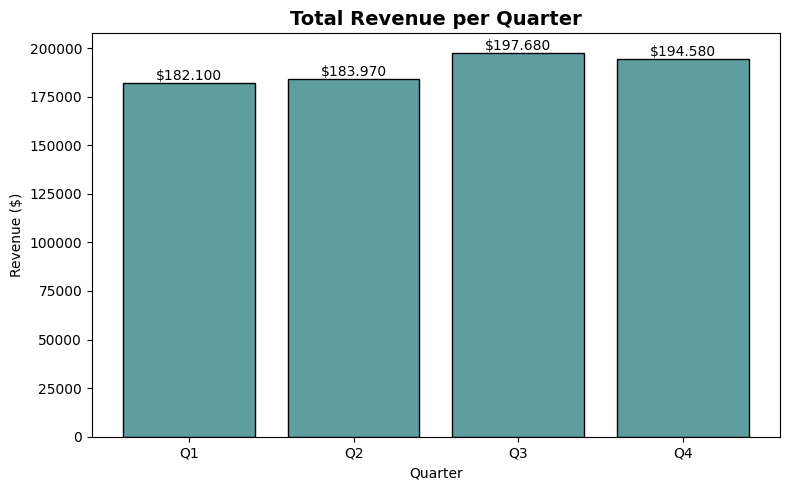

In [11]:

# Total quantity sold
total_quantity = df['quantity'].sum()
print(f"Total quantity sold: ${total_quantity:,.0f}".replace(",", "."))

# Category with the highest revenue
revenue_by_category = df.groupby('category')['revenue'].sum()
max_category = df.groupby('category')['revenue'].sum().idxmax()
max_revenue = df.groupby('category')['revenue'].sum().max()
print(f"Category with highest revenue: {max_category}, Revenue: ${max_revenue:,.0f}".replace(",", "."))

# # Average revenue per sale
avg_revenue = df['revenue'].mean()
print(f"Average revenue per sale: ${avg_revenue:,.0f}".replace(",", "."))


# Bar chart for each Q

df['date'] = pd.to_datetime(df['date'])  #transform to datetime type
df['quarter'] = df['date'].dt.quarter

quarterly_revenue = df.groupby('quarter')['revenue'].sum()

plt.figure(figsize=(8,5))

bars = plt.bar(quarterly_revenue.index, quarterly_revenue.values,
        color='#5F9EA0', edgecolor='black')

plt.title('Total Revenue per Quarter', fontsize=14, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Revenue ($)')
plt.xticks([1,2,3,4], ['Q1','Q2','Q3','Q4'])


# Add value labels above bars
for bar, value in zip(bars, quarterly_revenue.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f'${value:,.0f}'.replace(",", "."),
             ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

#Exercise 5 : Data Visualisation Using MatPlotLib & Subplots


*  Plot the function y = x^2 for x values ranging from -10 to 10. Add a title and label the x and y axes.

* Generate a bar chart to display the sales data of four different products (A, B, C, D) in a week. The sales values are 15, 30, 45, and 20 respectively. Label the chart appropriately.

* Create a pie chart representing the following data about favorite fruits of a group of people: Apples (40%), Bananas (30%), Cherries (20%), and Dates (10%). Customize the chart with different colors for each fruit and add a legend.

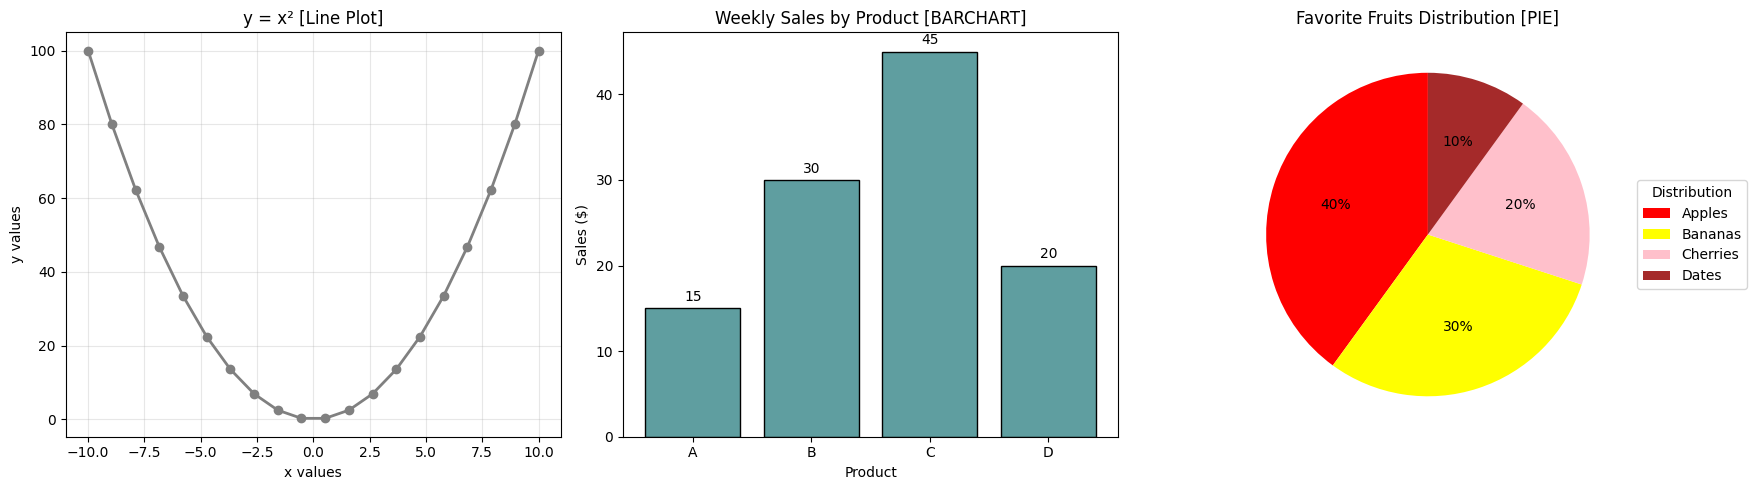

In [14]:
# ==============================
# Line Plot: y = x^2
# ==============================

x = np.linspace(-10, 10, 20)
y = x**2


# ==============================
# Bar Chart: Weekly Sales
# ==============================

products = ['A', 'B', 'C', 'D']
sales = [15, 30, 45, 20]


# ==============================
#  Pie Chart: Favorite Fruits
# ==============================

fruits = ['Apples', 'Bananas', 'Cherries', 'Dates']
percentages = [40, 30, 20, 10]
colors = ['red', 'yellow', 'pink', 'brown']  # real colours


# ==============================
# Create figure with 3 subplots
# ==============================

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Line plot
axs[0].plot(x, y,
          marker='o',           # Add points at each value
          linewidth=2,          # Thicker line
          markersize=6,         # Bigger points
          color='gray')    # Professional color

axs[0].set_title("y = x² [Line Plot]")
axs[0].set_xlabel("x values")
axs[0].set_ylabel("y values")
axs[0].grid(alpha=0.3)



# Bar chart
bars = axs[1].bar(products, sales, color='#5F9EA0', edgecolor='black')
axs[1].set_title("Weekly Sales by Product [BARCHART]")
axs[1].set_xlabel("Product")
axs[1].set_ylabel("Sales ($)")

#  Add value labels above bars
for bar in bars:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2,
                height + 0.5,
                f'{int(height)}',
                ha='center', va='bottom')


# Pie chart
wedges, texts, autotexts = axs[2].pie(
    percentages,
    colors=colors,
    autopct='%1.0f%%',
    startangle=90
)

axs[2].set_title("Favorite Fruits Distribution [PIE]")

# Move legend outside
axs[2].legend(
    wedges,
    fruits,
    title="Distribution",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)


plt.tight_layout()
plt.show()